# 4.2.1 Introduction to GPS Tracking of Birds

The global positioning system, or GPS, provides location information
anywhere on earth.
It was created and is maintained by the US government,
and anyone with a GPS receiver can use it for free.
GPS is used for various different purposes,
ranging from commercial to military applications.
GPS receivers have now been integrated to most smartphones,
making them commonplace.
Scientists have many specialized uses for GPS.
One fascinating area of research uses GPS to track movements of animals.
It is now possible to manufacturer a small GPS device that is solar charged,
so you don't need to change batteries, and use
it to track flight patterns of birds.
In this case study, we will introduce you
to manipulating, examining, and visualizing GPS data used
to tracking birds in this way.
The data for this case study comes from the LifeWatch INBO project.
Several data sets have been released as part of this project.
We will use a small data set that consists of migration data for three
gulls named Eric, Nico, and Sanne.
The csv file contains eight columns, and includes variables
like latitude, longitude, altitude, and time stamps.
In this case study, we will first load the data,
visualize some simple flight trajectories,
track flight speed, learn about daytime and much, much more.
We have made the file bird_tracking.csv available to you on the course site.
So all we need to do is read it in using pandas.
As usual, we'll start by importing pandas.
I'm going to call my data frame birddata.
We will read that in using pandas read_csv function.
The file is called bird_tracking.csv.
We can look at some basic info about the data frame by typing birddata.info.
In this case, we get a brief summary about the columns contained
in the data set.
We also learn that this data set contains approximately 62,000 entries.
We can look at the top of the data set by using the head function.
In this case, we get the first five rows of the data set.
If you've never seen data like this before,
it's worth taking a moment to examine the data
frame in a little bit more detail.

In [3]:
import pandas as pd
birddata = pd.read_csv('bird_tracking.csv')
birddata.info()
birddata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          61920 non-null  int64  
 1   altitude            61920 non-null  int64  
 2   date_time           61920 non-null  object 
 3   device_info_serial  61920 non-null  int64  
 4   direction           61477 non-null  float64
 5   latitude            61920 non-null  float64
 6   longitude           61920 non-null  float64
 7   speed_2d            61477 non-null  float64
 8   bird_name           61920 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 4.3+ MB


,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


# 4.2.2 Simple Data Visulizations

We'll get started by simply plotting the latitude and longitude of a flight
trajectory for a single bird in a standard two dimensional plot.
Latitude and longitude are coordinates along the surface of a sphere,
where a standard 2-D plot is a plane
so we would expect very strong distortions
for the flight trajectories.
This is especially true because the trajectories
cover a large spatial region.
We're doing this however, primarily to have a quick way to look at the data
and develop more intuition about it.
We'll be doing an actual cartographic projection later in this case study.
We'll proceed with plotting and we'll import our pyplot library
as plt. We'll also import NumPy as np as is usual.
One of the birds is called Eric.
Let's extract the indices, the rows of the data frame for Eric.
Bird data dot bird name.
We're looking for Eric in this data set.
I'm going to store the indices in a variable called ix.
Next we'll extract x and y-coordinates of the flight trajectories.
X and y are defined here as a tuple.
I'll first get the longitude corresponding to my index ix,
and then I'll get the latitude for the same positions.
And now we have our x and y-coordinates here.
I'm going to create a figure of whatever size is suitable,
and then we'll plot the trajectories.
X versus y, and in this case we'll be just using blue dots
to represent the flight trajectory.
Let's now look at a PDF version of this plot.
In this plot you can see the migration path that Eric has taken.
Again, the flight trajectory will be substantially distorted
because we did not implement any type of cartographic projection.
Nevertheless, we get a decent sense of the flight path.
Let's then plot the trajectories for all three birds in a single plot.
We'll be extracting the bird names using pandas unique function.
Bird data dot bird name.
And we can now look at the contents of this object.
And we have three birds Eric, Nico, and Sanne.
Our code will be essentially the same what we had before, except in this case
we have to loop over all three birds.
My main loop is going to be for bird name in bird names,
and I'll be making use of the code that we just
wrote to fill the following lines.
We'll proceed very much like before, except that when
we do find the index, instead of using Eric,
we'll be using our generic bird name.
We then extract the x and y-coordinates.
We'll move the figure establishment or figure creation at the very top.
And then we plot the flight patterns.
Once we're done we can also add labels.
Our x label is longitude.
And our y label is latitude.
Finally, we can insert a legend using plt legend
and we can specify the location of the legend.
In this case I'd like the legend to be in the lower right corner,
so location log equals lower right.
Let's try running the code.
If we'd like to keep a PDF version of this.
Before we run the code, we want to make sure
that we add the label for each plot.
And in this case, the label is bird name.
And we can now open the file.
Looking at the plot, we see that all three birds
seem to have pretty similar overall flight patterns.
However, Nico and Sanne seem to venture out further south than Eric does.
We'll be looking at these trajectories in more detail in the tasks to come.

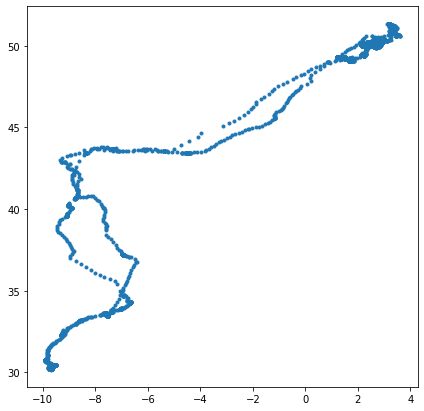

In [5]:
#Latitude and longitude are coordinates along the surface of a sphere, where the standard 2-D plot is aplane; therefore,
#distortions would be expected. However, an actual carographic projection will be completed later.

import matplotlib.pyplot as plt
import numpy as np

ix = birddata.bird_name == 'Eric' #extract rows of data for the bird Eric from the dataframe
x , y = birddata.longitude[ix], birddata.latitude[ix]

plt.figure(figsize=(7,7))
plt.plot(x,y,".")

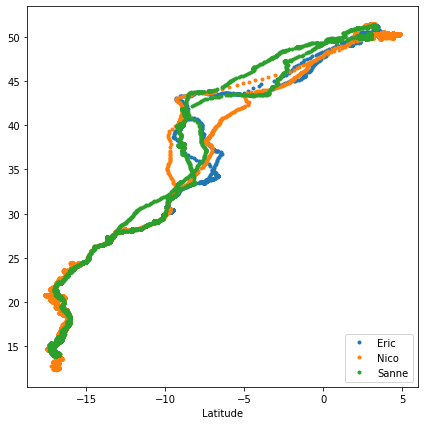

In [8]:
#plot the trajectory of all birds on a single plot
bird_names = pd.unique(birddata.bird_name) #pandas unique function extracts all unique values in a pd.Series
plt.figure(figsize=(7,7))
for bird_name in bird_names:
    ix = birddata.bird_name == bird_name 
    x , y = birddata.longitude[ix], birddata.latitude[ix]
    plt.plot(x,y,".", label=bird_name)
plt.xlabel("Longitude")
plt.xlabel("Latitude")
plt.legend(loc='lower right')
plt.savefig('3traj.pdf')

# 4.2.3 Examining Flight Speed

The data also contain estimates of two dimensional speeds of the birds.
That is how fast they were flying on a 2D
plane that is a local approximation to the curved surface of the earth.
Let's look at the speed data in a little bit more detail.
In this case I'm going to work in the editor.
I use my previous line.
In this case, we'll be just looking at the data for Eric.
We'll extract the speed data.
Bird data speed underscore 2D.
And we provide the index as an input.
We can then plot a histogram of his speed.
At this point you should see a fairly cryptic error message.
That's try to debug this.
Let's first look at the contents of speed.
I'm just going to look at the first 10 entries.
These are numbers so so far everything looks good.
If I try to pull out a histogram using just the first ten observations
of speed, everything should work out.
This works, so there must be something further along in the speed array
the hist function doesn't like.
Let's see if we have something else than numbers in the array.
I'm first going to look for non-number objects.
To do that, I'll by using the isnan function from NumPy.
Looking at the output, I can see that I at least
have a few trues, meaning that I have some non-zero number of NaNs included
in my array.
A more elegant way to find out if we have any NaNs in our array
is the following.
We can take the previous line of code and use the any method to ask
if any of the output is equal to true.
The answer is true, therefore we know that there
must be at least one NaN in our array.
Let's then find out how many NaNs we exactly have in our speed array.
The NumPy isnan function returns an array
that consists of true and false, in other words
Boolean variables, Boolean objects.
We can sum over them.
And when we do the sum, a true gets interpreted as a 1 and a false
gets interpreted as 0.
In this case we have 85 entries for Eric alone that are not numeric.
This is what's causing the problem with our histogram.
Let's now include only those points those observations that
are actually numeric.
I'm first going to find the NaNs in my speed array.
I will assign the output to ind for index.
We can look at it to confirm that it's a Boolean vector.
We can then take a bitwise complement of the ind array
which turns each occurrence of true to a false and vice versa.
We can try that out.
For example, we can see that the first few elements
have been turned to true when we take the complement off the ind vector.
We're now ready to proceed with the histogram.
We first look for the isnans.
And instead of using the entire speed array for the histogram,
we'll only include those entries for which ind is not equal to true.
You can try saving the output.
And we can now take a closer look at the histogram.
Now that we have a working version, we can tweak the code a bit
and make some further adjustments.
I'm going to do the following things.
I'm going to add an x label, a y label, I
will specify the locations of the bins, and I would also
like my histogram to be normalized.
At the top here, we have our original code.
And I'm just going to copy paste my modified code in here.
In this case, I've used the x label to add an x label,
the y label function to add a y label, and I have also
specified the locations of bins using the bins keyword argument
and NumPy linspace.
In this case, the first bin starts at 0 and the last bin ends at 30.
Finally, I have normalized the y-axis, meaning
that an integral over the histogram would be equal to 1.
I can accomplish this stating the normed keyword to be equal to true.
Let me run it and we'll look at this beauty.
This is our final histogram that quantifies is how fast Eric is flying.
Pandas provide some planning functions as well,
although less customizable than PLT plots,
they readily deal with things like NaNs.
However you want to make sure that you always
examine your data carefully and look for the presence of NaNs
before preparing your plots.
Let's look at how we would make the histogram using pandas.
In this case, the plotting functions are methods of data frame instances.
We're taking our bird data and we're looking
at the speed 2D, the two dimensional speed estimates for the birds.
Then we use the plot method.
As an argument, we have to specify what type of plot we would like to request.
In this case we'd like to get a histogram, so kind
of to be equal to hist.
We can also potentially specify numerous different keyword arguments.
In this case, I use the range keyword to specify the range of the histogram
to go from 0 to 30.
Let's try running the code.
I'm calling this pd_hist.pdf.
And we get an essentially identical histogram to what we had before.
The benefit of using pandas in this case was that we did not
have to deal with NaNs explicitly.
Instead, all of that happens under the hood.

In [9]:
#the data also contains esimations of the birds' 2D speed in reference to a 2D plane-- a local approximation
ix = birddata.bird_name == 'Eric'
speed = birddata.speed_2d[ix]
plt.hist[speed] #should have the error message 'max must be larger than min in range parameter'

TypeError: 'function' object is not subscriptable

(array([3., 1., 0., 0., 1., 2., 2., 0., 0., 1.]),
 array([0.15      , 0.59422108, 1.03844216, 1.48266324, 1.92688432,
        2.3711054 , 2.81532648, 3.25954756, 3.70376864, 4.14798972,
        4.5922108 ]),
 <BarContainer object of 10 artists>)

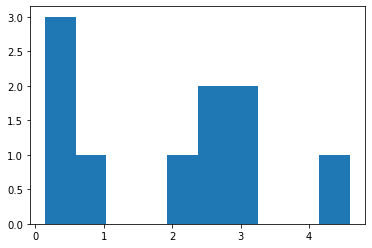

In [11]:
plt.hist(speed[:10]) #The first 10 entries can be plotted, so there may be a non-number later on in the histogram.

In [13]:
np.isnan(speed) #True if the element is Not A Number (NAN); False otherwise #another compiler shows the True entries

0        False
1        False
2        False
3        False
4        False
         ...  
19790    False
19791    False
19792    False
19793    False
19794    False
Name: speed_2d, Length: 19795, dtype: bool


In [14]:
np.isnan(speed).any() #.any() method determines if any of the data is True; an output of True means at least one entry is True

True

In [15]:
np.sum(np.isnan(speed)) #output equals the number of True values -- the number of NAN elements

85

In [17]:
ind = np.isnan(speed)
ind

0        False
1        False
2        False
3        False
4        False
         ...  
19790    False
19791    False
19792    False
19793    False
19794    False
Name: speed_2d, Length: 19795, dtype: bool

In [18]:
#take the bitwise compliment of the ind array, which reverses each element 
~ind

0        True
1        True
2        True
3        True
4        True
         ... 
19790    True
19791    True
19792    True
19793    True
19794    True
Name: speed_2d, Length: 19795, dtype: bool

Text(0, 0.5, 'Frequency')

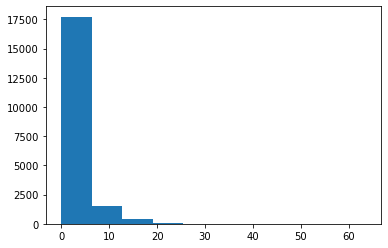

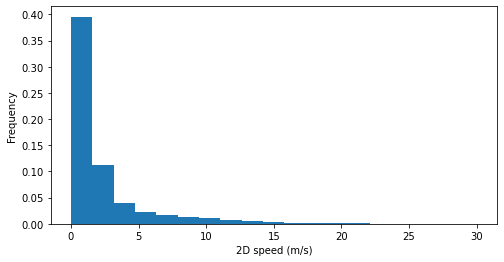

In [23]:
ix = birddata.bird_name == 'Eric'
speed = birddata.speed_2d[ix]
ind = np.isnan(speed)
plt.hist(speed[~ind]) #only include entries for which ind is not equal to True
plt.savefig('hist.pdf')

#optional formatting version
plt.figure(figsize=(8,4))
speed = birddata.speed_2d[birddata.bird_name == "Eric"]
ind = np.isnan(speed)
plt.hist(speed[~ind], bins=np.linspace(0, 30, 20), density=True) #specified the location of bins and normalized the histogram
#the normalization means the integral over the entire histogram would equal 1
plt.xlabel('2D speed (m/s)')
plt.ylabel('Frequency')

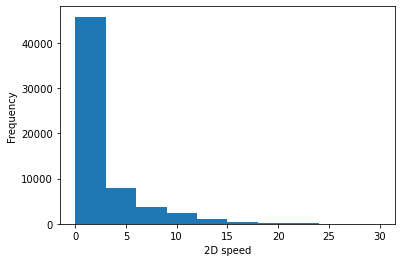

In [24]:
#pandas also provides plotting functions; however, they are less customizable than PLT plots. Pandas plots readily deal with
#NaNs, though.
#It is good practice to examine data for NaNs before plotting.
## Pandas histogram of the data

birddata.speed_2d.plot(kind='hist', range=[0,30])
plt.xlabel('2D speed');
plt.savefig('pd_hist.pdf')

# 4.2.4 Using Datetime

We often need to be able to deal with data that has timestamped events,
like our GPS data in this case study.
We also frequently need to be able to do our arithmetical operations with date
and timestamps, such as computing the time interval between two observations.
Python's datetime is made for dealing with these types of data.
One of the columns in our bird data set is timestamp.
It's called date time.
Let's look at a couple of the first entries.
In this case, we can see that we first have the date stamp and then
the timestamp.
The date is in the format of year, month, and day.
The entries in the data frame are all strings for date stamps.
If we'd like to operate on the time and date stamps,
such as finding out how much time has elapsed between any two timestamps,
we first need to convert them into so-called daytime object, that
supports our arithmetic operations.
Let's import the date time module first and explore it.
We'll import the datetime just as import datetime, so no abbreviated form.
To become more familiar with the library,
let's play with the function today.
It returns to us a datetime, datetime object,
that consists of the current date and timestamp.
Let's try running it again, but this time we
will assign the outcome or output to a variable.
So let's say time 1 is equal to this.
Then we wait a moment, and then we define time 2,
and we run the same method again.
We can now take time 2 and subtract time 1.
In this case, the output is what's called a time delta object.
It tells us how much time has elapsed between time 1 and time 2.
We can try rerunning time 2, and if we do the subtraction again,
as we'd expect, more time has passed.
In this case 30 seconds has passed between time 2 and time 1.
The resulting object is called date time time delta object.
If we'd like to compute how much time has passed between any two
observations in our data set, we first have
to convert the timestamps, now given as strings, to datetime objects.
Let's investigate the first timestamp in a bit more detail.
Here is the field following second is UTC,
which stands for coordinated universal time,
which is an offset that is expressed in hours.
In this case those entries are always 0, something you can check easily.
Since the offsets are all 0, we're going to ignore them moving forward.
Let's first pull out the first timestamp from our data set.
That's located at row 0, so bird data dot date time.
I'm going to call this date string.
To check these, you can type date str and Python tells us that it's a string.
Let's first look at our date string.
In this case, we're interested in date string,
with the exception of the last three characters.
So doing the slicing gives us access to part of the string that we actually
care about.
Next we're going to use strip time function
to turn a string to a datetime object.
This is a somewhat complicated looking expression.
Let's look at it in a little bit more detail.
The first argument is the string, which we would
like to turn into a datetime object.
The second argument is also a string, but in this case
the latter string specifies the formatting of the first string.
Let's look at the former string in a little more detail.
For example, the first percentage uppercase
Y tells Python to expect a year, expressed in four digits.
The lowercase m tells Python to expect a month, expressed in two digits,
and so on.
If we look at the timestamp, the percentage capital H
tells Python to expect a 24 hour timestamp, expressing
the hours of the event.
Let's try running this line
and we can see that the output is a datetime object.
The year is 2013, month is 8 corresponding to August,
date is 15, and so on.
We can now use this function to go over every single row in our data set,
and create a new datetime object corresponding to every single row.
Here is some code that I wrote previously.
Let's look at the code and try to understand what it does.
I first set up an empty list, which is called timestamps.
I then loop over my bird data-- more specifically,
over every single row in my data set.
I'm using k as my loop variable.
For every single row, I extract the date time,
except I ignore the last three characters.
Once I've converted it to a datetime object
I append the resulting object to my timestamps list.
We can try running the code,
and we can just take a look at the first few of our timestamps.
In this case, everything looks good.
The next step for me is to construct a panda series object
and insert the timestamp from my Python list into that object.
I can then append the panda series as a new column in my bird data data frame.
Let's look at the code to do that briefly.
On the right-hand side, I first create a panda series object
from my timestamps list, and I explicitly specify the index
to match the index of my bird data.
On the left-hand side I then take my existing bird data.
I create a new column, which is called timestamp,
and I assign my panda series object that new timestamp column.
We can try running the code, and we can then look at the top couple of rows.
In this case, we can see that the timestamp
has been appended, or attached, to our table as the final column.
Let's now practice doing arithmetic with our timestamps.
I'm going to take my bird data timestamp, let's say from row 4.
I will subtract that.
I have my bird data timestamp and column 3.
In this case, we're getting a time delta object which is what we wanted.
What I'd like to do next is to create a list that
captures the amount of time that has elapsed
since the beginning of data collection.
To do this, we will need 2 lines of code.
First I will extract the timestamps for Eric,
and that object is going to be called times.
I then create my elapsed time object and I
construct that as a list comprehension.
Let's look at the list comprehension in a little more detail.
Let's first focus on the for loop for time in times.
What happens is that we're taking the time sequence and going over it
one object at a time.
These objects are called time-- that's our loop variable.
The element that gets appended the list is the following--
that's given at the beginning of the list comprehension--
time minus times at 0.
In other words, for each object in the list, time is going to be different--
whereas times square bracket 0 marks the beginning of the time measurement,
in this case, for Eric.
Let's run our two lines of code.
Now we can look at our elapsed time.
If you look at entry 0, we would expect that to be equal to 0.
If you look at the entry at say 1000, we know that in this case
12 days, 2 hours, and 2 minutes have passed
between observation located at 0, and observation located at index 1000.
But how can we measure time in certain units, like hours or days?
It turns out this is pretty easy to do.
We can take the object that we had before,
and we can simply divide that by a time delta object.
In this case, if I'd like to know how many days have passed,
I create a time delta object that's equal to 1 day.
I can accomplish that by using the key word days equals to 1.
In this case, I know that exactly 12.084 and so on days
have passed between observation 0 and 1000.
If I'd like to know this in hours, I can modify the time delta object.
I can set it to hours equals 1 and I know that approximately 290 hours
have passed between these two points.
We can now look at the data for Eric in a little bit more detail.
I'm going to make a plot where on the x-axis,
we have the number of the observation, and on the y-axis
we have the amount of time that has elapsed, measured in days.
I'm going to be using the same exact syntax as before.
I'm going to call this timeplot.pdf and we can look at the plot.
Looking at the plot, we see more or less a straight line.
If the times that passes between any two consecutive observations
was the exact same, for all observations,
we would see one perfectly straight line.
In this case we see a couple of jumps in our curve.
What this indicates to us is that there are observations
that are further apart from one another than other observations in the data
set.
This type of exploration of data really helps
you understand your data set very thoroughly.

In [25]:
birddata.date_time[0:3]
#the time stamps need to be converted to a datetime object before arithmetic operations are supported
#the +00 portion follows seconds and corresponds to UTC; since these offsets are zero, we will ignore them moving forward

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
Name: date_time, dtype: object

In [26]:
import datetime
datetime.datetime.today() #returns datetime, datetime object, as the current timestamp

datetime.datetime(2021, 5, 15, 4, 14, 24, 929907)

In [27]:
time_1 = datetime.datetime.today()

In [29]:
time_2 = datetime.datetime.today()

In [31]:
time_2 - time_1
#output:  time delta object

datetime.timedelta(seconds=15, microseconds=576933)

In [34]:
date_str = birddata.date_time[0]
date_str

'2013-08-15 00:18:08+00'

In [ ]:
date_str[:-3] #we are not interested in the last 3 characters-- the UTC portion; slicing

In [37]:
#use the strip time function to turn the string into a datetime object
datetime.datetime.strptime(date_str[:-3], "%Y-%m-%d %H:%M:%S") #the string with '%' specifies the formatting of the string to be
#converted  #uppercase Y means year in four digits; lowercase m means month in two digits; and so on
#uppercase H means a 24 hour timestamp

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [39]:
#loop over the entire data set to convert the datetime string to datetime objects
timestamps = []
for k in range(len(birddata)):
    timestamps.append(datetime.datetime.strptime(birddata.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))
    
timestamps[0:3]

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58)]

In [41]:
#make a pandas series object and insert the timestamp from the Python list into the object
birddata['timestamp'] = pd.Series(timestamps, index=birddata.index)
birddata

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42
...,...,...,...,...,...,...,...,...,...,...
61915,61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne,2014-04-30 22:00:08
61916,61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne,2014-04-30 22:29:57
61917,61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne,2014-04-30 22:59:52
61918,61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne,2014-04-30 23:29:43


In [42]:
birddata.timestamp[4] - birddata.timestamp[3]

Timedelta('0 days 00:29:51')

In [43]:
#make a list that contains the amount of time that has elapsed since data collection has started 
times = birddata.timestamp[birddata.bird_name == 'Eric']
elapsed_time = [time - times[0] for time in times]
elapsed_time[0]

Timedelta('0 days 00:00:00')

In [45]:
elapsed_time[1000]

Timedelta('12 days 02:02:00')

In [48]:
#Measure time in certain units such as hours or days:  datetime object divided by time delta object
elapsed_time[1000] / datetime.timedelta(days=1) 
#output:  time in units of days

12.084722222222222

In [50]:
elapsed_time[1000] / datetime.timedelta(hours=1) #output:  time in units of hours

290.03333333333336

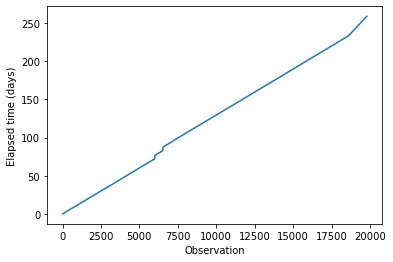

In [52]:
plt.plot(np.array(elapsed_time) / datetime.timedelta(days=1))
plt.xlabel('Observation')
plt.ylabel('Elapsed time (days)');
plt.savefig('timeplot.pdf')

#output: approximately linear data which means the times between two consecutive observations is exactly the same in most cases;
#however, there are a few jumps in the data which indicates that the time between those observations is increased

# 4.2.5 Calculating Daily Mean Speed

Our next goal is to create a plot where on the y-axis,
we have the mean daily speed.
And on the x-axis, we have time measured in days.
Before we proceed further, let's think about the algorithm first
on the white board.
Our data consists of time stamps which are spaced unevenly.
This is our time axis here.
The first point on the left corresponds to our observation number 0.
This is observation number 1, 2, 3, 4, 5, 6, 7, 8, and so on.
All time is measured relative to our observation 0.
If we were to examine the first few points here,
we would find that they likely correspond to day 0.
The first day of the experiment.
We'd like to be collecting the indices for all those observations
that fall within day zero.
As soon as we hit day 1, we would like to compute the mean velocity
over those observations that we have just collected.
We would then like to start collecting, or aggregating,
our indices for the new day.
To say that differently, we'd like to be collecting indices corresponding
to different observations until we hit the next day.
Our starting point is day zero.
So I'm going to be using a variable called next day
and that's going to be equal to 1.
I also need a way to keep track of all the different indices.
I'm going to call that inds.
Let's say that these three observations correspond to day zero.
These to day 1, day 2, and so on.
I will be going over all of my observations.
I will always check.
Have I hit the next day yet.
The day for these first three observations is 0,
so the test will be false.
As soon as I hit this observation, I know that I've hit the next day.
As I loop over all of these points, I will
be building up this list on the fly.
So that by the time I hit observation number 3,
I will have indices 0, 1, and 2 in my inds list.
Once this happens, I do the following:
I first compute the average velocity over these indices
for the previous or the current day.
And I then reset my next day to be equal to plus 1 to what I was before.
So in this case, I'll be setting that to be equal to 2.
I will proceed this way until I have no more data left.
I'm first going to set up two variables.
Next day is going to be initially equal to 1.
And the indices that I'm collecting, I'm going to call that inds,
is just going to be an empty list.
The next task will be to loop over elapsed days.
I'd like to know both the index of any given observation as well as its value.
I can accomplish this using enumerate.
Enumerate returns a tuple which consists of index, and in this case, a time.
This is a for loop for (i, t) enumerate(elapsed_days):.
This is my primary loop.
What I want to be able to test is have I hit the next day.
If that hasn't happened, then I would like to keep collecting my indices.
In this case, represented by i in my collection of indices called inds.
So if t is less than next_day, I can just add i, or append(i) to my indices.
So inds.append(i).
Otherwise, I need to do something else.
That's the else part of my if statement.
The first thing I need to do is to calculate the mean daily speed.
In this case, I don't have, yet, a way of keeping track of those speeds.
So I'll need to add, in this case, let's go with the list to keep track
of all of these daily mean speeds.
I'm going to call this daily mean speed.
And I will be setting it up as a Python list.
The first task is to compute mean speed.
The second task is to increase next_day by 1.
So we increment next_day by1.
And finally, we need to reset inds.
So we create an empty Python list called inds.
Lets then work on the first line.
Our data frame is called data.
And we're interested in speed_2d.
In this case, we're specifically interested in only those entries
that we've kept track of in inds.
These are the specific indices over which
we would like to compute the mean of.
We then apply np.mean to these observations.
And finally, we want to append the result to our daily means speed.
Let's try running the code to see if we've made any syntactical errors.
The code runs, so we seem to be in good shape.
Finally, let's add a plotting component to this code.
A plotting routine consists of four lines of code.
We first create the figure.
We then plot the daily mean speed.
And we add x and y labels to our plot.
Finally, I'm going to save this as a PDF.
We can now look for the plot on the computer.
So looking at the plot, we first see that we
have data for approximately 260 days.
On any given typical, or average day, Eric
is flying, on average, about 2 meters per second,
just by eyeballing the figure.
However, we can see that there seemed to be two periods within the observation
window during which Eric is flying substantially more.
These are the periods that correspond to his migration patterns.
We can see that around day, equal to 90 or 95 perhaps,
his mean daily speed is as high as 9 meters per second.
We see a similar peak for day perhaps 230 or so.
Looking at this plot, we've been able to identify when exactly Eric carries out
his migration.
The next step we'd like to accomplish is to find out where he actually
migrates from and where does he end up.

In [54]:
data = birddata[birddata.bird_name == 'Eric']
times = data.timestamp
elapsed_time = [time - times[0] for time in times]
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days=1)

#daily mean speed algorithm
next_day = 1
inds = []
daily_mean_speed = []
for (i,t) in enumerate(elapsed_days):  #enumerate returns a tuple of the index and its element
    if t < next_day:
        inds.append(i)
    else:
        # compute mean speed
        daily_mean_speed.append(np.mean(data.speed_2d[inds])) #call 2d speed for relevant inds, calc. mean, and append to list
        next_day += 1
        inds = []  #reset inds

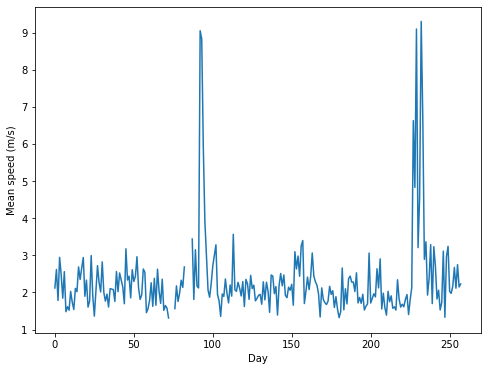

In [55]:
#general plotting routine:
plt.figure(figsize=(8,6)) #create the figure
plt.plot(daily_mean_speed) #plot the data -- in this case Daily Mean Speed
plt.xlabel("Day")
plt.ylabel("Mean speed (m/s)"); #add x and y labels to plot
plt.savefig("dms.pdf") #save as a PDF

#peak periods correspond to the bird's, Eric's, migration patterns

In [59]:
iy = birddata.bird_name == 'Sanne'
birddata[iy]

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
40916,40916,55,2013-08-15 00:01:08+00,833,-91.499509,49.931065,2.281893,0.372156,Sanne,2013-08-15 00:01:08
40917,40917,54,2013-08-15 00:31:00+00,833,-141.804053,49.931076,2.281900,1.318484,Sanne,2013-08-15 00:31:00
40918,40918,55,2013-08-15 01:01:19+00,833,-10.651840,49.931016,2.281933,0.076158,Sanne,2013-08-15 01:01:19
40919,40919,56,2013-08-15 01:31:38+00,833,14.727689,49.931053,2.281911,0.014142,Sanne,2013-08-15 01:31:38
40920,40920,55,2013-08-15 02:01:24+00,833,-169.882200,49.931042,2.281893,0.094340,Sanne,2013-08-15 02:01:24
...,...,...,...,...,...,...,...,...,...,...
61915,61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne,2014-04-30 22:00:08
61916,61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne,2014-04-30 22:29:57
61917,61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne,2014-04-30 22:59:52
61918,61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne,2014-04-30 23:29:43


# 4.2.6 Using the Cartopy Library

Our next step is to install Cartopy, a library that
provides cartographic tools for Python.
We can identify this module just by googling Cartopy.
First, we'll google Cartopy.
In this case, it's the first hit that I get on this particular search.
We'll then click Documentation, and we'll
pick the latest version, in this case version 0.13.
You can explore the documentation page to learn more about this library.
The first step for us is to install the library.
Find the Getting Started section on the page, and click installation guide.
We've been using the Anaconda Python distribution throughout this course.
One of the benefits of this distribution is
that it makes it easy to install new packages.
We will not go into details here, but instead, we'll
just follow the instructions from the web page.
Working on a Mac, we can simply copy the one line of code that we have here,
and we can run that in a terminal window.
Once we have our terminal window, we just copy/paste a line, and then we wait.
In this case, we want to proceed, so I reply yes or y.
And depending on your computer, this might take something
from 10 to 15 seconds to maybe even a minute or two,
so be patient at this stage.
In this case, Python has updated some of the existing
packages that needed to be updated in order for Cartopy
to be installed correctly.
Once the process has been completed, your terminal prompt
will appear on the screen.
Cartopy makes it easy to draw maps, and it seems
to work well on multiple platforms.
We should point out that there is some other libraries for working with maps,
but some of them don't work on both Mac and Windows platforms,
and others can be more difficult to use.
Here we're using just some of the very basic features of Cartopy,
and you can explore more features on your own.
We'll first perform two standard imports.
To move forward, we need to specify a specific projection
that we're interested in using.
Cartopy provides several different projection alternatives.
In this case, we'll be using one of the standard projections.
Our next task is loop over all the birds,
and plot their projected trajectories on the map.
The code looks very similar to what we had before.
We're first looping over all of our bird names.
Then we're extracting the rows from our data
frame to correspond to that particular bird.
Then we extract the longitude and latitude in variables x and y.
The final line, the plot line, is what introduces the transformation.
In this case, we're using a specific transformation from CCRS.
We also want to set up a new figure at the beginning.
Finally, we need to set the extent of our axes on the map.
This is something that's found usually by trial and error.
Before we can call our axes on the final line,
we actually first have to create that.
We can do that after we've created the figure using plt.axes.
Finally, we'll display the legend, and we'll save these as map.pdf.
We can then try running our code.
We can then look for our map.
In this case, we can see the flight trajectories as before,
but in this case, we've used an actual cartographic projection.
That means that these correspond to an actual map.
In fact, we can superimpose a map on top of this.
We can add some more features to our plot.
For example, we can add land, borders of countries, and so on.
In this case, I'm adding four different lines.
These four lines add landmasses, oceans, coastlines, and borders of countries
to the map.
We can now rerun our code and take a look at it.
Looking at the flight trajectories superimposed on top of a map
gives us much more insight about the migratory patterns of these birds.
We've just looked at some very basics of how to visualize
bird flights obtained from GPS data.
We have prepared some additional exercises for you
to continue investigating flight paths in more detail.
Have fun.

E:\anaconda3\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


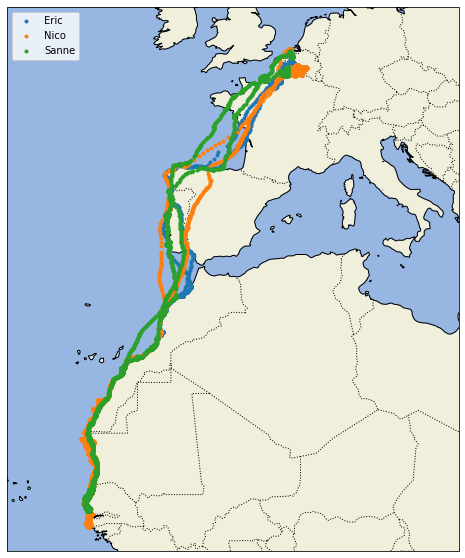

In [64]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

proj = ccrs.Mercator() #Cartopy has several different projections; we will use a standard projection

plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0)) #extent of axes on the map -- usually foudn throught trial and error
#optional additions to the map:
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')


#loop over all birds and plot their trajectories on the map
for name in bird_names:
    ix = birddata['bird_name'] == name
    x, y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x, y, '.', transform=ccrs.Geodetic(), label=name)
    
plt.legend(loc='upper left')
plt.savefig('map.pdf')

